In [1]:
import os
from subprocess import Popen, PIPE as P


class DotDisplay:

    def __init__(self, dot):
        self.dot = dot
    
    def _ipython_display_(self):
        from IPython.display import display
        bundle = {}

        dot = self.dot
        bundle['text/vnd.graphviz'] = dot

        try:
            kwargs = {} if os.name != 'nt' else {"creationflags": 0x08000000}
            p = Popen(['dot', '-T', "svg"], stdout=P, stdin=P, stderr=P, **kwargs)
            image = p.communicate(dot.encode('utf-8'))[0]
            bundle['image/svg+xml'] = image.decode("utf-8")
        except OSError as e:
            if e.errno != os.errno.ENOENT:
                raise

        #bundle['text/plain'] = '\n'.join(map(str, self.log))
        display(bundle, raw=True)

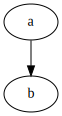

In [2]:
ddisplay = DotDisplay("digraph{a->b}")
ddisplay

In [3]:
import ipywidgets

In [4]:
@ipywidgets.interactive
def f(x=1):
    print(x)
f

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), Output()), _dom_classes=('widget-int…

In [5]:
import importlib
import pyalgdb.visualization
importlib.reload(pyalgdb.visualization)

<module 'pyalgdb.visualization' from 'C:\\Users\\linha\\Desktop\\ws\\pyalgdb\\pyalgdb\\visualization.py'>

In [6]:
import graphviz
import sqlite3
import graphviz

from pyalgdb.execution_tree_creator import ExecTreeCreator
from pyalgdb.top_down import TopDown
from pyalgdb.heaviest_first import HeaviestFirst
from pyalgdb.visualization import Visualization
from pyalgdb.single_stepping import SingleStepping
from pyalgdb.divide_and_query import DivideAndQuery

In [7]:
from pyalgdb.node import Node
from pyalgdb.validity import Validity
from ipywidgets import VBox, Output

class JNNavigationStrategy(TopDown):
    
    def __init__(self, *args, **kwargs):
        super(JNNavigationStrategy, self).__init__(*args, **kwargs)
        self.joutput = Output()
        
    @property
    def view(self):
        return self.joutput
    
    def evaluate(self, node: Node) -> Node:
        self.exec_tree.node_under_evaluation = node
        vis = Visualization(self.exec_tree)
        vis.generate_exec_tree(str(id(node)))
        self.joutput.clear_output()
        with self.joutput:
            display(DotDisplay(str(vis.graph)))
            print("-------------------------")
            print("Evaluating node {}".format(node.name))
            print("Name: {}".format(node.name))
            print("Evaluation_id: {}".format(node.ev_id))
            print("Code_component_id: {}".format(node.code_component_id))
            print("Parameters: name | value ")
            for p in node.params:
                print (" {} | {} ".format(p.name, p.value))
            print("Returns: {}".format(node.retrn))
            ans = input("Is correct? Y/N ")
            if ans == "Y" or ans == "y":
                # The YES answer prunes the subtree rooted at N
                self.recursive_validate(node)
            else:
                # The NO answer prunes all the nodes of the ET,
                # exept the subtree rooted at N
                node.validity = Validity.INVALID
                if node.parent is not None:
                    for c in node.parent.childrens:
                        if c is not node:
                            self.recursive_validate(c)

            self.exec_tree.node_under_evaluation = None
        return node

In [8]:


NOW2_SQLITE_PATH = 'C:/Users/linha/Desktop/ws/py-scripts-examples/age-avg/.noworkflow/db.sqlite'

CURSOR = sqlite3.connect(NOW2_SQLITE_PATH).cursor()
creator = ExecTreeCreator(CURSOR)
exec_tree = creator.create_exec_tree()
nav = JNNavigationStrategy(exec_tree)
display(nav.view)
result_tree = nav.navigate()
vis = Visualization(result_tree)
vis.view_exec_tree('exec_tree')

Output()

Is correct? Y/N N
Is correct? Y/N N
Is correct? Y/N N


In [9]:
o = Output()
with o:
    print(1234)

In [10]:
o

Output()

In [11]:
o.clear_output()